# Predicting Soccer Players' Transfer Value

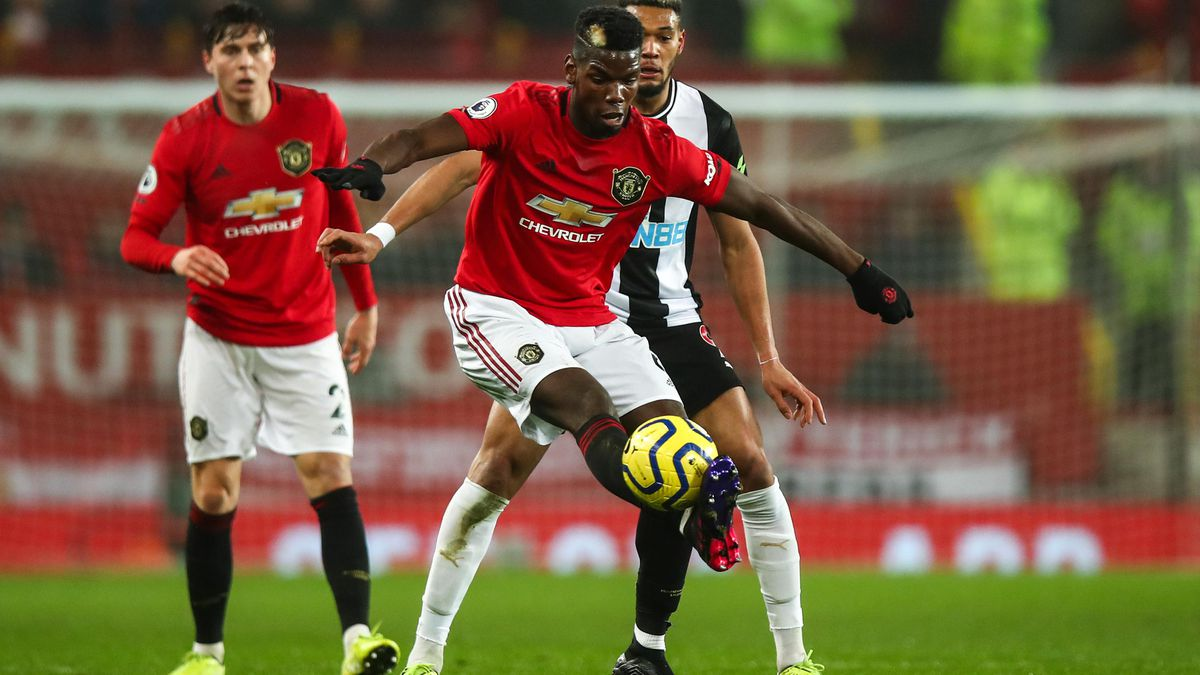

### Author - Akintunde Rockson

## Project Abstract

### Introduction 

Every year, a plethora of soccer players move from team to team in search of many things such as more playing time, higher contracts, more trophies, or even new challenges. In most parts of the world, there are two transfer seasons, one in the winter (December-January) and one in the summer (June-August). During these times, teams negotiate with one another as buyers and sellers. The buyers try to come to an agreement with the sellers on an acceptable fee for the player that is going to be transferred. Nowadays, this fee is comfortably in the millions, with the cream of the crop having market values well over 100 million euros.

### Why is this important?

Being able to estimate the market value of a soccer player is definitely a useful task. In bidding wars that go on between multiple prospective buyers, it is important for the soccer clubs to know an accurate estimate of what a player is worth so as to make sure not to vastly overpay for a player that is simply not worth the money being requested. You can also find undervalued players with this method. Also, data analytics is taking the sports world by storm, with soccer being one of those sports. Stories like Moneyball put the sports world on notice and as a result of that, many people saw the benefits of meshing sports with data and while soccer may have been a bit late to the party, they are here now. This has manifested itself in many ways such as the creation of expected goals (xG), a metric which tells us the quality and quantity of chances one team or player produces in any given match. Stats such as these are used in pregame meetings in order to plan tactics effectively.

### How this project works 

The tutorial aims to predict soccer players' transfer values in order to determine which players are overvalued and undervalued. The dataset we're using is a FIFA soccer video game dataset. We start by scraping data from the sofifa dataset which lists the stats for all the players in the game. These stats are gotten by the game developers who try to quantify the quality of each player on a scale from 1-99 so for example a soccer player who is good at scoring goals but poor at defending may have a 95 for shooting but a 32 for defending. Through this, we can build regression models in order to predict what a player's market value will be and compare it to the market value the FIFA video game has given to each player. With our best model, we will compare the differences between actual value (FIFA) and the predicted values (regression) in order to decide which player are over valued or under valued in today's market. Here is a link to the dataset: https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset=1

In [412]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [413]:
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

In [414]:
import warnings #removing the warnings
warnings.filterwarnings('ignore')

## Data collection/curation + parsing

I scraped data on the most recent stats FIFA gave to soccer players from sofifa.com with the use of BeautifulSoup. The link shows players characteristics data and each page has 60 players so a loop was needed in order to get all the data I need.

In [415]:
plist = []

i = 0
while i < 3000:
    url = "https://sofifa.com/?&showCol%5B%5D=pi&showCol%5B%5D=ae&showCol%5B%5D=hi&showCol%5B%5D=wi&showCol%5B%5D=pf&showCol%5B%5D=oa&showCol%5B%5D=pt&showCol%5B%5D=bo&showCol%5B%5D=bp&showCol%5B%5D=gu&showCol%5B%5D=vl&showCol%5B%5D=wg&showCol%5B%5D=rc&showCol%5B%5D=ta&showCol%5B%5D=cr&showCol%5B%5D=fi&showCol%5B%5D=he&showCol%5B%5D=sh&showCol%5B%5D=vo&showCol%5B%5D=ts&showCol%5B%5D=dr&showCol%5B%5D=cu&showCol%5B%5D=fr&showCol%5B%5D=lo&showCol%5B%5D=bl&showCol%5B%5D=to&showCol%5B%5D=ac&showCol%5B%5D=sp&showCol%5B%5D=ag&showCol%5B%5D=re&showCol%5B%5D=ba&showCol%5B%5D=tp&showCol%5B%5D=so&showCol%5B%5D=ju&showCol%5B%5D=st&showCol%5B%5D=sr&showCol%5B%5D=ln&showCol%5B%5D=te&showCol%5B%5D=ar&showCol%5B%5D=in&showCol%5B%5D=po&showCol%5B%5D=vi&showCol%5B%5D=pe&showCol%5B%5D=cm&showCol%5B%5D=td&showCol%5B%5D=ma&showCol%5B%5D=sa&showCol%5B%5D=sl&showCol%5B%5D=tg&showCol%5B%5D=gd&showCol%5B%5D=gh&showCol%5B%5D=gc&showCol%5B%5D=gp&showCol%5B%5D=gr&showCol%5B%5D=tt&showCol%5B%5D=bs&showCol%5B%5D=ir&showCol%5B%5D=pac&showCol%5B%5D=sho&showCol%5B%5D=pas&showCol%5B%5D=dri&showCol%5B%5D=def&showCol%5B%5D=phy&offset="+str(i)
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page,"lxml")
    rows = soup.find_all("tr")
    for row in rows:
        c = row.find_all('td')
        c_to_string = str(c)
        c_sub = (re.sub(re.compile('<.*?>'),'',c_to_string))
        plist.append(c_sub)
        res = pd.DataFrame(plist)
    i += 60

In [416]:
res.drop_duplicates(subset=None, keep="first", inplace=True)

In [417]:
res.to_pickle("PlayerListInitial")
res = pd.read_pickle("PlayerListInitial")
len(res)

2957

After the scraping process, I was left with a total of 2,956 players unique players from the sofifa website

In [418]:
new_column_name_players = ['Name','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
 'Position','Growth','Value','Wage','Release_Clause','Attacking','Crossing','Finishing','Heading_Accuracy',
 'Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy','Long_Passing','Ball_Control','Movement',
 'Acceleration','Sprint_Speed','Agility','Reactions','Balance','Power','Shot_Power','Jumping','Stamina',
 'Strength','Long_Shots','Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
 'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving','GK_Handling','GK_Kicking',
 'GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats','Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']

In [419]:
res

,0
0,[]
1,"[\n, \n Y. TielemansCM CDM, 23, 83, 86, \n\n\n..."
2,"[\n\n\n\n\nFIFA 21 Apr 23, 202173 ↗ 74 Heading..."
3,"[\n, \n T. CastagneRB RM LB, 24, 79, 82, \n\n\..."
4,"[\n, \n P. CutroneST, 22, 74, 79, \n\n\n\nVale..."
...,...
3043,"[\n, \n I. VassilevLW RW ST, 19, 61, 79, \n\n\..."
3044,"[\n, \n Pablo GozálbezCAM CF, 19, 66, 80, \n\n..."
3045,"[\n\n\n\n\nFIFA 21 Apr 23, 202148 ↗ 52 Short P..."
3046,"[\n, \n D. AbiamaST, 21, 64, 72, \n\n\n\nSpVgg..."


This is the resulting data after scraping it from the sofifa website. As you can see, the data still needs to be organized in a clearer fashion in order for it to be understandable and presentable so we shall work on theat in the next step

## Data management/representation 

In [420]:
res = pd.read_pickle("PlayerListInitial")

res = res[0].str.split(',',expand=True)


res[1] = res[1].str.replace("\n ","")

for char in ["GK","RB","RCB","CB","LCB","LB","RWB","RDM","CDM","LDM","LWB","RM","RCM","CM","LCM","LM","LAM","CAM","RAM","RW","RF","CF","LF","LW","LS","ST","RS"]:
    res[1]=res[1].str.replace(char,"")
    res[1]=res[1].str.lstrip()

res[5] = res[5].str.replace("\n\n\n\n","")
res[5] = res[5].str.split("\n").str[0]
res[5] = res[5].str.strip()

res[6] = res[6].replace(r'Loan', np.nan, regex=True)
res = res.iloc[1:]

resWoLoan = res[res[6].notna()]
resWoLoan.drop(resWoLoan.columns[[0,6,66,67,68,69]],axis=1, inplace=True)
mask_loan = res[6].isnull()
resloan = res.loc[mask_loan].shift(-1, axis=1)
resloan.drop_duplicates(subset=[6], keep="first", inplace=True)
resloan.drop(resloan.columns[[5,6,66,67,68,69]],axis=1, inplace=True)
resWoLoan.columns = new_column_name_players
resloan.columns = new_column_name_players

res = pd.concat([resWoLoan,resloan]).reset_index()
del res["index"]

res.drop_duplicates(subset=None, keep="first",inplace=True)


In [421]:
res = res[~res["Height"].str.contains("~")]
res = res[~res["Age"].str.contains("\n")]
res = res[res["Height"].str.contains("'")]

In [422]:
res["Height"] = res["Height"].str[:-1]

def parse_height(height):
    height = height.split("'")
    feet = float(height[0])
    inch = float(height[1])
    return ((feet*30.48) + (inch*2.54))

res["Height"]=round(res["Height"].apply(lambda x:parse_height(x)),0)

In [423]:
#Converting Weight to kg
res["Weight"] = round(res["Weight"].str.split("lbs").str[0].astype(float)*0.45359237,0)

#Cleaning to Value column and convert to decimal
res["Value"] = res["Value"].str.replace("€","")
res["Value"] = res["Value"].str.replace("M","")
res.loc[res["Value"].str.contains("K"),"Value"]=res["Value"].str.split("K").str[0].astype(float)/1000
res["Value"] = round(res["Value"].astype(float),2)
res = res.loc[res["Value"]>0]

#Cleaning Wage column and convert to decimal
res["Wage"] = res["Wage"].str.replace("€","")
res.loc[res["Wage"].str.contains("K"),"Wage"]=res["Wage"].str.split("K").str[0].astype(float)*1000
res["Wage"] = round(res["Wage"].astype(float)/1000000,5)

#Cleaning Release_Clause column and convert to decimal
res["Release_Clause"] = res["Release_Clause"].str.replace("€","")
res["Release_Clause"] = res["Release_Clause"].str.replace("M","")
res.loc[res["Release_Clause"].str.contains("K"),"Release_Clause"]=res["Release_Clause"].str.split("K").str[0].astype(float)/1000
res["Release_Clause"] = round(res["Release_Clause"].astype(float),2)

res.head(15)

,Name,Age,Overall,Potential,Team,Height,Weight,Foot,Best_Overall,Position,Growth,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY
0,Y. Tielemans,23,83,86,Leicester City,175.0,72.0,Right,85,CM,3,49.5,0.095,97.8,384,79,74,65,88,78,408,79,81,78,85,85,352,65,60,69,81,77,383,87,65,80,67,84,384,68,76,80,87,73,84,208,68,73,67,50,6,8,10,14,12,2169,447,2 ★,62,79,85,80,71,70
2,T. Castagne,24,79,82,Leicester City,180.0,80.0,Right,80,RWB,3,22.0,0.065,43.5,322,79,59,69,75,40,316,77,58,33,70,78,373,79,79,71,78,66,335,62,72,85,64,52,319,68,78,77,69,27,68,224,77,75,72,63,14,9,15,10,15,1952,428,1 ★,79,57,71,76,75,70
3,C. Strandberg,24,71,76,Abha Club,188.0,90.0,Left,73,ST,5,2.9,0.009,5.0,312,50,74,62,59,67,248,63,42,31,46,66,317,73,86,41,67,50,372,78,75,66,90,63,261,58,13,70,59,61,68,65,23,26,16,58,9,12,9,15,13,1633,367,1 ★,80,71,53,61,25,77
4,J. Vardy,33,87,87,Leicester City,178.0,74.0,Right,87,ST,0,51.0,0.170,96.9,394,69,92,79,70,84,344,78,68,60,56,82,416,87,86,76,91,76,378,87,79,77,68,67,388,87,49,93,74,85,88,163,57,52,54,62,15,14,7,15,11,2145,450,3 ★,86,85,68,80,56,75
5,H. Barnes,22,81,85,Leicester City,180.0,66.0,Right,82,CAM,4,37.5,0.090,74.1,345,78,78,46,77,66,376,82,76,69,68,81,410,85,83,81,82,79,357,80,59,75,64,79,305,48,43,81,79,54,75,136,45,47,44,40,6,5,11,8,10,1969,426,1 ★,84,77,76,81,45,63
6,Nuno Mendes,18,77,87,Sporting CP,175.0,70.0,Left,77,LWB,10,21.0,0.004,46.2,311,74,45,67,71,54,340,72,66,59,68,75,402,82,86,82,76,76,353,80,65,76,69,63,318,67,75,72,59,45,75,222,73,76,73,50,7,8,8,12,15,1996,427,1 ★,84,57,68,74,74,70
7,S. Botman,20,77,84,LOSC Lille,193.0,81.0,Left,79,CB,7,19.5,0.023,41.0,238,40,24,78,69,27,250,49,45,28,64,64,298,60,65,58,73,42,333,65,77,68,86,37,282,78,76,37,54,37,71,235,78,80,77,49,12,9,8,6,14,1685,367,1 ★,63,36,56,55,78,79
8,L. Thomas,19,68,82,Leicester City,178.0,68.0,Left,68,LB,14,2.7,0.013,6.8,264,67,38,57,61,41,277,67,51,42,51,66,349,79,75,68,60,67,285,44,66,77,59,39,294,72,61,66,56,39,57,193,68,64,61,52,12,7,10,11,12,1714,372,1 ★,77,41,58,66,64,66
13,K. Schmeichel,33,85,85,Leicester City,188.0,89.0,Right,85,GK,0,17.5,0.100,33.3,105,18,12,16,44,15,126,12,13,15,46,40,286,45,51,61,82,47,232,60,60,34,64,14,153,35,20,13,59,26,67,41,14,14,13,415,84,78,80,83,90,1358,463,2 ★,84,78,80,90,48,83
14,M. Lacroix,20,76,84,VfL Wolfsburg,190.0,88.0,Right,78,CB,8,15.5,0.026,29.5,236,35,29,74,70,28,237,56,37,26,57,61,335,68,84,53,76,54,304,46,80,67,84,27,265,67,77,32,51,38,77,228,78,78,72,56,14,7,12,12,11,1661,374,1 ★,77,33,53,58,77,76


To improve the dataframe, I did multiple things such as splitting columns, removing unnecessary characters (\n), body conversions (height to cm, weight to kg), price conversions, numeric conversions and removing NA columns amongst some others

In [424]:
#Deleting some rows that composure columns is blank
res = res.loc[res["Composure"]!=" "]
res = res[res["Base_Stats"]!=' ']

#Cleaning to IR column
res["Int_Reputation"]=res["Int_Reputation"].str[:-1]

In [425]:
#Convertsion to ints

converted_cols=['Age','Overall', 'Potential', 'Best_Overall','Growth','Attacking','Crossing','Finishing','Heading_Accuracy',
 'Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy','Long_Passing','Ball_Control','Movement',
 'Acceleration','Sprint_Speed','Agility','Reactions','Balance','Power','Shot_Power','Jumping','Stamina',
 'Strength','Long_Shots','Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
 'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving','GK_Handling','GK_Kicking',
 'GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats','Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']

for i in converted_cols:
    res[i] = res[i].astype("int")

In [426]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2528 entries, 0 to 2955
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              2528 non-null   object 
 1   Age               2528 non-null   int64  
 2   Overall           2528 non-null   int64  
 3   Potential         2528 non-null   int64  
 4   Team              2528 non-null   object 
 5   Height            2528 non-null   float64
 6   Weight            2528 non-null   float64
 7   Foot              2528 non-null   object 
 8   Best_Overall      2528 non-null   int64  
 9   Position          2528 non-null   object 
 10  Growth            2528 non-null   int64  
 11  Value             2528 non-null   float64
 12  Wage              2528 non-null   float64
 13  Release_Clause    2528 non-null   float64
 14  Attacking         2528 non-null   int64  
 15  Crossing          2528 non-null   int64  
 16  Finishing         2528 non-null   int64  


In [427]:
#Saving Final Player List as Pickle
res.to_pickle("PlayerListFinal")
#Reading Final Player List
plist= pd.read_pickle("PlayerListFinal")

## Exploratory data analysis

Noe that the data is well organized, the logical next step is to take a peek into the dataframe and get an understanding of what is going on there. I decided to look into the players and clubs with the highest total transfer values as well as the mean value per position just to see if it was similar to what I expected as an avid soccer follower

In [428]:
#Top 5 Rating Player
plist.nlargest(5,columns="Value")[["Name","Age","Team","Value"]]

,Name,Age,Team,Value
135,Neymar Jr,28,Paris Saint-Germain,132.0
56,R. Lewandowski,31,FC Bayern München,124.5
116,Bruno Fernandes,25,Manchester United,121.0
194,M. Salah,28,Liverpool,120.5
495,J. Oblak,27,Atlético Madrid,120.0


In [429]:
#Top 5 Mean Value based on Position
pd.DataFrame(plist.groupby("Position").Value.mean().sort_values(ascending=False)).head()

,Value
Position,
CF,20.552174
RW,20.331250
LW,17.882692
CM,15.053316
GK,14.376647


In [430]:
#Top 5 Club (Mean Value)
pd.DataFrame(plist.groupby("Team").Value.mean().sort_values(ascending=False).head())

,Value
Team,
FC Bayern München,41.524000
Liverpool,35.563214
Paris Saint-Germain,34.923810
Manchester City,33.672000
Atlético Madrid,33.587500


In [431]:
#Top 5 Club (Total Value)
pd.DataFrame(plist.groupby("Team").Value.sum().sort_values(ascending=False).head())

,Value
Team,
FC Bayern München,1038.10
Liverpool,995.77
Manchester United,797.60
Juventus,739.60
Paris Saint-Germain,733.40


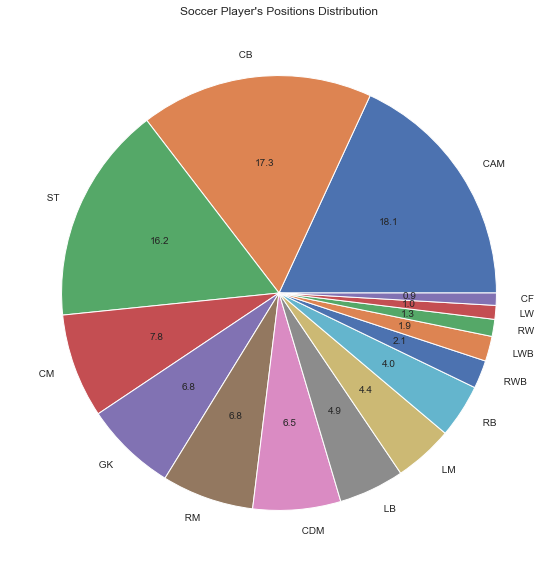

In [432]:
plt.figure(figsize=(10,10))
loc=plist.Position.value_counts()
loc.plot(kind='pie' ,autopct='%.1f',fontsize=10,subplots=True)
plt.title("Soccer Player's Positions Distribution")
plt.ylabel("")
plt.show()

<Figure size 2000x2000 with 0 Axes>

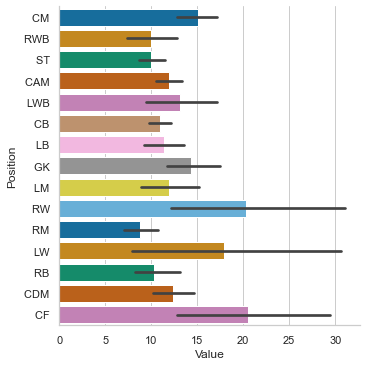

In [433]:
plt.figure(figsize=(10,10),dpi=200)
graph = sns.catplot(y="Position", x="Value", kind="bar",  data=plist, palette="colorblind")
plt.show()

In general, the data exploration offered no surprises. You would expect the like of Mbappe and Neymar to have the highest market values due to their young ages and the quality they possess which has made them such household names. All the clubs that had the highest transfer values possess some of the best players so there are also no shock there. Strikers (CFs) also obviously possess higher transfer values in the market due to the importance and general flashiness associated with their job of scoring goals

## Modelling

For my first regression model, I split my data frame into two parts: Xb, yb. This is just the starter model. Xb was made to include all numeric columns while yb is the target column so it only contains the value

In [434]:
# Slice data into faeture and target
Xb= plist.drop(columns=["Value","Name","Team","Foot","Position"])
yb= plist.loc[:,"Value"]

# fit model with target as player market value 
pmodelb = sm.OLS(yb, Xb, data=plist)
ressb = pmodelb.fit()
print(ressb.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1785.
Date:                Sun, 16 May 2021   Prob (F-statistic):                        0.00
Time:                        18:35:25   Log-Likelihood:                         -6555.4
No. Observations:                2528   AIC:                                  1.321e+04
Df Residuals:                    2479   BIC:                                  1.349e+04
Df Model:                          49                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

For this starter model, the r^2 value is 0.977. This is great on paper but from the notes, you can see that there are some issues that need to be addressed with this model. First, the model has some complexity due to there being 59 features in xB which isn't ideal. Also, there are strong multicollinearity problems since the condition number is very high and the smallest eigenvalue being 1.01e-22 is an indication of that

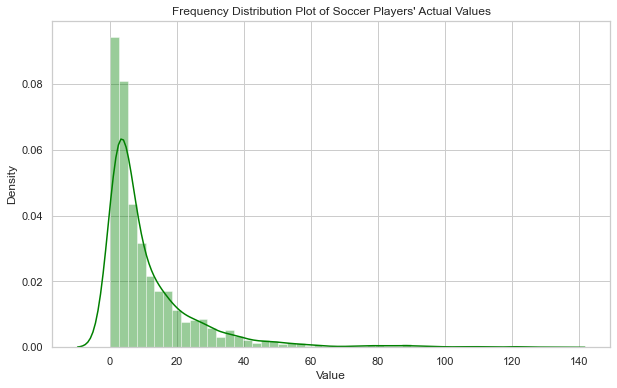

In [435]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(plist.Value, color='green').set_title("Frequency Distribution Plot of Soccer Players' Actual Values")
plt.show()

Next, we decided to look into the frequency distribution of our transfer values and we can see that there is a strong right skew which isn't good. In order to make the data more usable I decided to try a logarithmic trnasformation

Text(0.5, 1.0, "Frequency Distribution Plot of Soccer Players' Logaritmic Values")

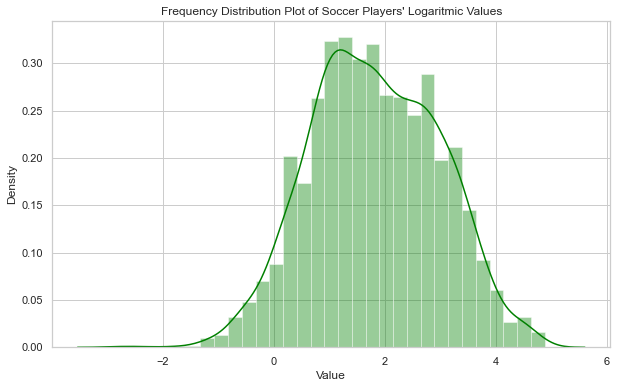

In [436]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(np.log(plist.Value), color='green').set_title("Frequency Distribution Plot of Soccer Players' Logaritmic Values")

This clearly produced much better results as the data looks much more like a normal distibution with the logarithmic trnasformation of the transfer values

<AxesSubplot:xlabel='Overall', ylabel='Value'>

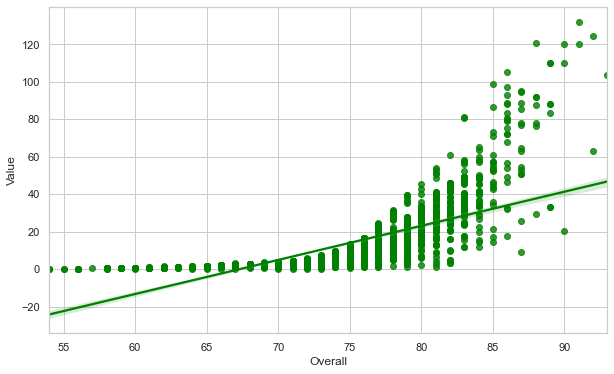

In [437]:
plt.figure(figsize=(10,6))
sns.regplot(x="Overall",y="Value",data=plist, color='green')

In [438]:
#Changing columns order
plist = plist[['Name','Value','Age','Overall','Potential','Team','Height','Weight','Foot','Best_Overall',
                           'Position','Growth','Wage','Release_Clause','Attacking','Crossing','Finishing',
                           'Heading_Accuracy','Short_Passing','Volleys','Skill','Dribbling','Curve','FK_Accuracy',
                           'Long_Passing','Ball_Control','Movement','Acceleration','Sprint_Speed','Agility',
                           'Reactions','Balance','Power','Shot_Power','Jumping','Stamina','Strength','Long_Shots',
                           'Mentality','Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
                           'Defending','Marking','Standing_Tackle','Sliding_Tackle','Goalkeeping','GK_Diving',
                           'GK_Handling','GK_Kicking','GK_Positioning','GK_Reflexes','Total_Stats','Base_Stats',
                           'Int_Reputation','PAC','SHO','PAS','DRI','DEF','PHY']]

In [439]:
plist['Value_log']= np.log(plist['Value'])

The next step in order to improve our regression model is to reduce the number of features drastically. Ideally, I would want only a few strongly correlated values to predict the transfer values instead of the 59 I have right now. In order to help with this decision making process, I will look at the correlation matrix

In [440]:
#View the correlations
plist.corr()

,Value,Age,Overall,Potential,Height,Weight,Best_Overall,Growth,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,Int_Reputation,PAC,SHO,PAS,DRI,DEF,PHY,Value_log
Value,1.000000,0.221865,0.730965,0.628824,0.029772,0.084841,0.736946,-0.336383,0.759548,0.969400,0.253659,0.219279,0.188905,0.130507,0.322991,0.213453,0.264038,0.197453,0.236017,0.208413,0.317820,0.248017,0.250519,0.123157,0.135366,0.155328,0.657844,0.096045,0.328067,0.318838,0.145626,0.241784,0.167790,0.209386,0.286813,0.157359,0.145642,0.200281,0.384388,0.174498,0.489071,0.110920,0.140392,0.103517,0.085343,0.070495,0.064105,0.066778,0.074582,0.068446,0.074073,0.392657,0.587832,0.468484,0.210460,0.332031,0.500660,0.474749,0.174989,0.307021,0.802245
Age,0.221865,1.000000,0.630077,-0.243078,0.096705,0.278974,0.569708,-0.860802,0.413049,0.201003,0.210231,0.151019,0.123242,0.180038,0.198134,0.221580,0.179466,0.039028,0.186586,0.221034,0.251508,0.112714,-0.042375,-0.205156,-0.200906,-0.069602,0.601587,-0.069250,0.322908,0.363348,0.220933,0.031907,0.296990,0.187041,0.286221,0.244670,0.154292,0.130312,0.277918,0.240075,0.486738,0.090739,0.129400,0.077580,0.063321,0.156945,0.152934,0.160437,0.153322,0.158185,0.149970,0.318086,0.488156,0.652903,-0.152897,0.359957,0.460167,0.318548,0.198281,0.397602,0.329185
Overall,0.730965,0.630077,1.000000,0.448045,0.074281,0.198018,0.986518,-0.759911,0.680054,0.690250,0.326080,0.282931,0.204411,0.222338,0.411789,0.265790,0.327875,0.217292,0.291987,0.265145,0.433833,0.296701,0.225957,0.039579,0.056736,0.119367,0.906243,0.043953,0.478817,0.463807,0.258780,0.297454,0.314814,0.271891,0.416451,0.300060,0.267650,0.235572,0.473825,0.235464,0.687662,0.205248,0.249452,0.189173,0.169935,0.131101,0.125710,0.129840,0.129207,0.129226,0.132923,0.535351,0.814753,0.564657,0.145449,0.440941,0.683293,0.604914,0.319484,0.520155,0.923723
Potential,0.628824,-0.243078,0.448045,1.000000,0.012050,-0.049236,0.484642,0.240658,0.389958,0.615713,0.055343,0.058567,0.026658,-0.003318,0.175382,0.011332,0.100356,0.096711,0.057949,0.026766,0.172384,0.126347,0.184710,0.133489,0.141713,0.113986,0.371000,0.061214,0.085855,0.076188,0.030385,0.142893,0.006975,0.031713,0.087576,0.016907,0.095806,0.029953,0.200663,-0.015953,0.249258,0.086424,0.095297,0.081630,0.078676,0.072940,0.069947,0.066212,0.073269,0.071348,0.078847,0.169767,0.349010,0.150224,0.234217,0.116479,0.275737,0.316699,0.129217,0.128917,0.644836
Height,0.029772,0.096705,0.074281,0.012050,1.000000,0.757745,0.073990,-0.071884,0.045706,0.024500,-0.349579,-0.511011,-0.379515,0.151227,-0.321194,-0.356287,-0.472752,-0.494412,-0.481313,-0.432672,-0.268558,-0.415668,-0.671281,-0.585571,-0.415839,-0.697581,0.065584,-0.816849,-0.106311,-0.191452,0.142656,-0.286641,0.608195,-0.411613,-0.285868,0.029848,0.018015,-0.440962,-0.377980,-0.310702,-0.153375,0.008916,0.009044,0.008666,0.008607,0.336260,0.333005,0.333428,0.323192,0.332593,0.336623,-0.357625,-0.070164,0.049451,-0.345624,-0.140792,-0.218322,-0.338213,0.155233,0.527233,0.031986
Weight,0.084841,0.278974,0.198018,-0.049236,0.757745,1.000000,0.187289,-0.250783,0.119909,0.073233,-0.248537,-0.413130,-0.277220,0.168193,-0.245980,-0.242002,-0.368091,-0.407043,-0.374611,-0.313951,-0.202068,-0.333631,-0.549533,-0.514661,-0.359022,-0.606723,0.176646,-0.658503,0.040770,-0.024328,0.202805,-0.237968,0.681617,-0.286455,-0.186323,0.101782,0.001306,-0.334866,-0.274415,-0.194495,-0.035998,-0.013801,-0.001486,-0.017505,-0.020923,0.316687,0.311819,0.313533,0.307928,0.315225,0.314107,-0.231577,0.055227,0.165708,-0.290117,-0.012873,-0.111787,-0.220058,0.128923,0.602556,

In [441]:
#Correlation With Value (most correlated with positive)
pd.DataFrame(plist.corr()["Value_log"]).sort_values("Value_log", ascending=False).head(10)

,Value_log
Value_log,1.000000
Best_Overall,0.934856
Overall,0.923723
Reactions,0.832954
Value,0.802245
Base_Stats,0.763238
Release_Clause,0.760351
Wage,0.648946
Potential,0.644836
Composure,0.637492


Based off of the correlation matrix, I decided to go with Overall, Best_Overall, Release Clause and Potential as my new independent variables

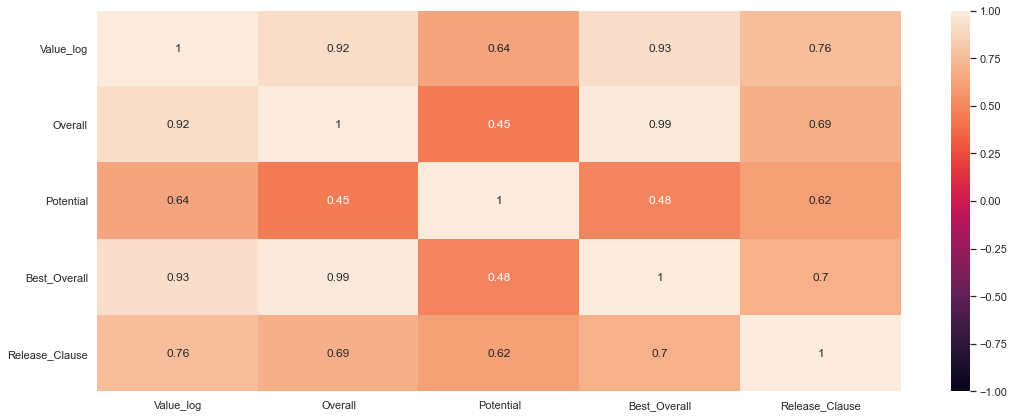

In [442]:
#Heatmap of correlation values
plist_selected_features= plist[['Value_log','Overall','Potential','Best_Overall','Release_Clause']]
plt.figure(1, figsize=(18, 7))
sns.set(style="whitegrid")
sns.heatmap(plist_selected_features.corr(), annot=True, vmin=-1, vmax=1)
plt.yticks(rotation=0); 
plt.show()

<Figure size 1296x576 with 0 Axes>

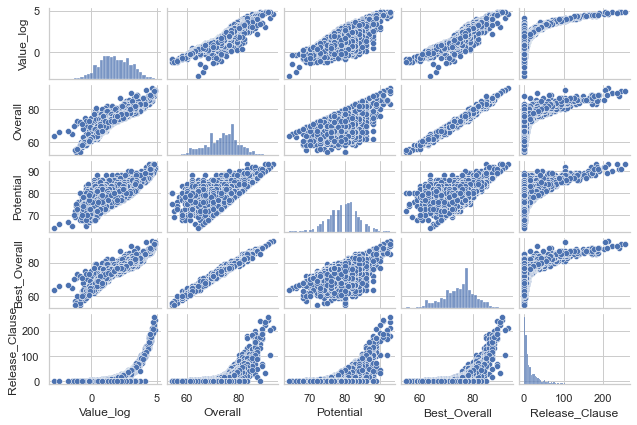

In [443]:
#Pairplot of selected features
plt.figure(1, figsize=(18, 8))
sns.set(style="whitegrid")
g=sns.pairplot(plist_selected_features, height=1.2, aspect=1.5, palette="colorblind")
plt.yticks(rotation=90); 
plt.show()

## Final Model

In [444]:
Xs= plist.loc[:,['Overall','Potential','Best_Overall','Release_Clause']]
ys= plist.loc[:,"Value_log"]

pmodels = sm.OLS(ys, Xs, data=plist)

res_ss = pmodels.fit()

print(res_ss.summary());

                                 OLS Regression Results                                
Dep. Variable:              Value_log   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              7581.
Date:                Sun, 16 May 2021   Prob (F-statistic):                        0.00
Time:                        18:35:33   Log-Likelihood:                         -2293.8
No. Observations:                2528   AIC:                                      4596.
Df Residuals:                    2524   BIC:                                      4619.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

With the new selected features, this regression results look much better. Now with less features, our r^2 value is 0.918 which is still high and we have no multicollinearity issues anymore. The next step I will take is to split my data into train, test and validation sets and compare the model results with other regression results like Polynomial, Lasso and Ridge regression

In [445]:
#set up the 4 models:

X1= plist.loc[:,['Overall','Potential','Best_Overall','Release_Clause',]]
y1= plist.loc[:,"Value"]

yl = np.log1p(y1)

X_train, X_test, y_train, y_test = train_test_split(X1,yl,test_size=0.2, random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X1,yl, test_size=.25, random_state=10)


lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=0.05, normalize=True)

lm_lasso = Lasso(alpha=0.05, normalize=True)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X1_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm.fit(X_train, y_train)
print("LINEAR REGRESSION FOR:")
print(f'All data R^2: {lm.score(X1, yl):.6f}')
print(f'Test data R^2: {lm.score(X_test, y_test):.6f}')
print(f'Validation data R^2: {lm.score(X_val, y_val):.6f}')
print("")

lm_reg.fit(X_train_scaled, y_train)
print("RIDGE REGRESSION FOR:")
print(f'Test data R^2: {lm_reg.score(X_test_scaled, y_test):.6f}')
print(f'Validation data R^2: {lm_reg.score(X_val_scaled, y_val):.6f}')
print("")


lm_lasso.fit(X_train,y_train)
print("LASSO REGRESSION FOR:")
print(f'Test data R^2: {lm_lasso.score(X_test, y_test):.6f}')
print(f'Validation data R^2: {lm_lasso.score(X_val, y_val):.6f}')
print("")

lm_poly.fit(X_train_poly, y_train)
print("SECOND DEGREE POLYNOMIAL REGRESSION FOR:")
print(f'Test data R^2: {lm_poly.score(X_test_poly, y_test):.6f}')
print(f'Validation data R^2: {lm_poly.score(X_val_poly, y_val):.6f}')

LINEAR REGRESSION FOR:
All data R^2: 0.929813
Test data R^2: 0.934702
Validation data R^2: 0.935982

RIDGE REGRESSION FOR:
Test data R^2: 0.935386
Validation data R^2: 0.936354

LASSO REGRESSION FOR:
Test data R^2: -0.002313
Validation data R^2: -0.001097

SECOND DEGREE POLYNOMIAL REGRESSION FOR:
Test data R^2: 0.957356
Validation data R^2: 0.961096


It turns out that the Polynomial regression produces the best results due to its r^2 value being the highest

In [446]:
#Run Cross Validation

lm = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state = 10)
cross_val_score(lm, X1, yl, cv=kf, scoring='r2')

print(round(np.mean(cross_val_score(lm, X1, yl, cv=kf, scoring='r2')),5))

0.92902


Text(0, 0.5, 'Actual Value (log)')

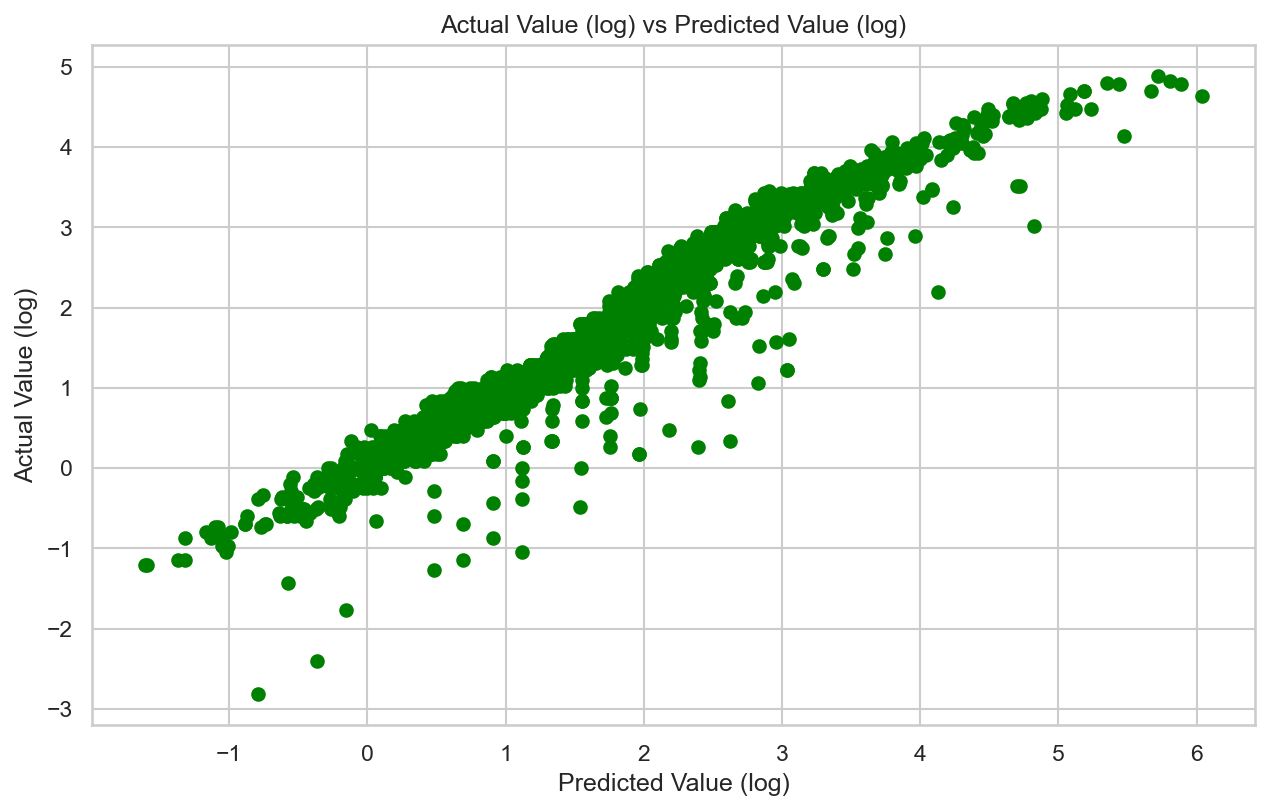

In [447]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,ys);
pred = lr.predict(Xs)
plt.scatter(pred,ys,color='green')
plt.title("Actual Value (log) vs Predicted Value (log)")
plt.xlabel("Predicted Value (log)")
plt.ylabel("Actual Value (log)")

Text(0, 0.5, 'Actual Value')

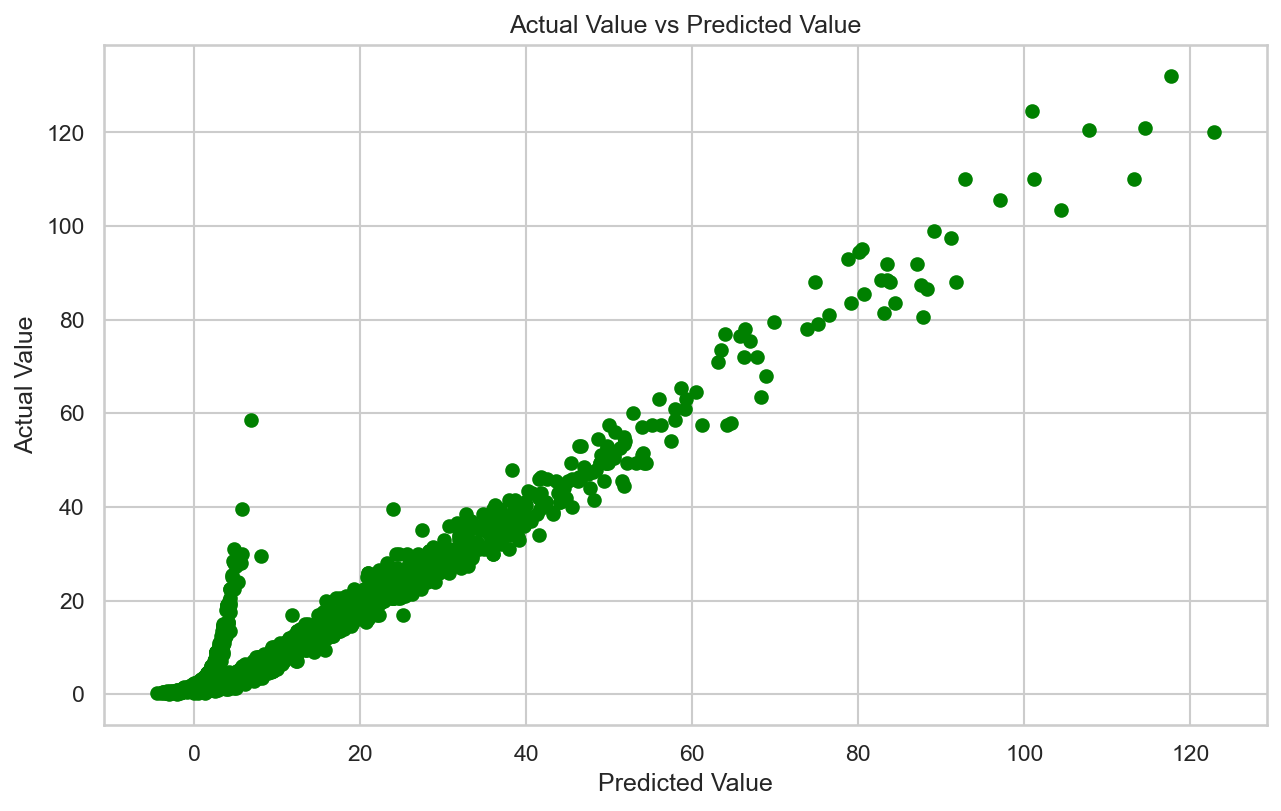

In [448]:
# Regression Fit with Log
plt.figure(figsize=(10,6),dpi=150),
lr = LinearRegression()
fit = lr.fit(Xs,np.exp(ys));
pred = lr.predict(Xs)
plt.scatter(pred,np.exp(ys), color='green')
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

## Results 

Now it's time to find the most overrated and underrated players on the FIFA 2021 video game

Text(0, 0.5, 'Value')

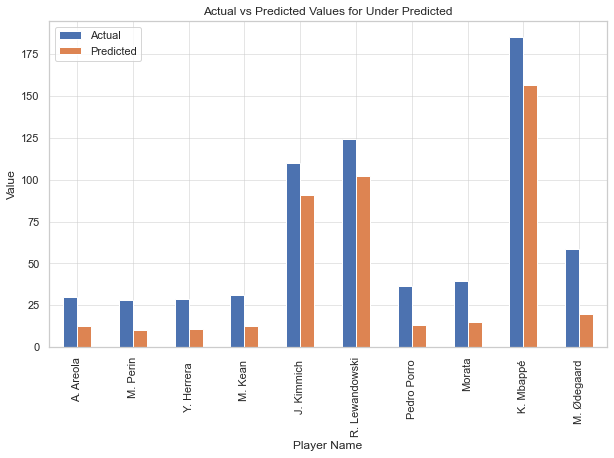

In [449]:
#comparision of Actual and Predicted Values for Under Predicted plot
df_over[["Actual","Predicted"]].plot(kind='bar',figsize=(10,6))
plt.grid(linewidth='0.5')
plt.title("Actual vs Predicted Values for Under Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')

According to our results, the most overrated players in world soccer include the likes of Martin Ødegaard, Kylian Mbappé, and Joshua Kimmich. These players are some of world soccer's best but according to our model, the players are overvalued in today's market. This definitely comes as a surprise as these are very highly rated players already. However, player like Morata and Moise Kean are some players that you may expect to be on this list just based on general media perception

Text(0, 0.5, 'Value')

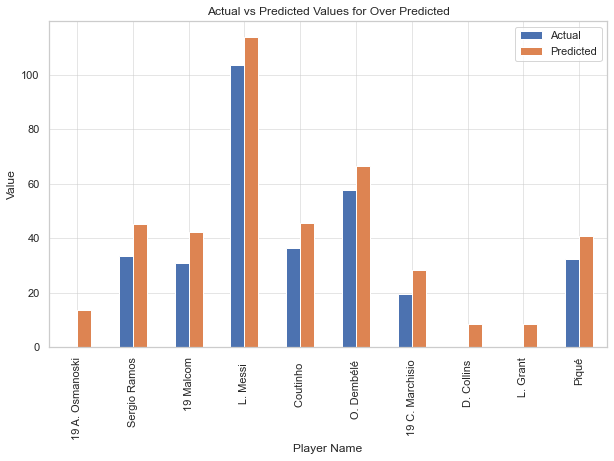

In [450]:
#Plot the comparision of Actual and Predicted Values for Over Predicted
df_under[["Actual","Predicted"]].plot(kind='bar',figsize=(10,6))
plt.grid(linewidth='0.5')
plt.title("Actual vs Predicted Values for Over Predicted")
plt.xlabel("Player Name")
plt.ylabel('Value')

As for underrated players, some players appear here as well. The biggest one being Lionel Messi, arguably the greatest soccer player of all time, is considered underrated according to our model whicjh possible speaks to just how amazing of a player he is. His teammates, Coutinho and Dembélé also feature on the list. Maybe this means that Barcelona, the club they play for needs to hike up their asking price for these players.

## Conclusion

I was able to use prediction models to determine which statistics are important in determining if a soccer player is overvalued and undervalued. The regression model looked good and it gave us some good variables to consider for estimating a player's worth in today's market.

The model worked well and looks like it could be a good predictor of a player's value. Though not perfect, a model that predicts with 100% accuracy using analytics alone is basically impossible, as there are many more factors outside the world of analytics that need to be considered. As of now there is no concrete, objective criteria given clubs to determine a players value, but perhaps the statistics the model marked above could help clubs dictate what would be a good price for a play to go for.